In [1]:
import pandas as pd
import scipy.stats as stats
from scipy.stats import ttest_ind
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("all_2013_data.csv")
diabetes=pd.read_csv("top_ten_diabetes.csv")
obese=pd.read_csv("top_ten_obese.csv")

data.head(12)

,State,WIC Participants,Nat School Lunch Program Participants,School Breakfast Program Participants,Summer Food Participants,% Adults with Diabetes,% Obese Adults,Population
0,AL,139001,539664,224173,30308,15.489552,36.128358,4829479
1,AK,23055,52495,20741,5078,7.103571,31.325000,728929
2,AZ,182501,646767,289520,23688,11.093333,28.773333,6624617
3,AR,89777,332497,166376,41946,13.308000,35.898667,2958663
4,CA,1431881,3294580,1517341,114689,8.774138,24.131034,38335203
5,CO,96874,375033,155733,17933,6.482812,20.682812,5267603
6,CT,54248,280253,87971,12171,8.475000,25.587500,3596003
7,DE,20797,94571,39522,8190,11.666667,30.500000,925395
8,DC,15674,50569,34873,34778,8.100000,22.400000,649165
9,FL,483565,1638775,750969,145389,12.034328,29.817910,19582022


In [3]:
data = data.sort_values("% Obese Adults", ascending = True)
data.head(10)

,State,WIC Participants,Nat School Lunch Program Participants,School Breakfast Program Participants,Summer Food Participants,% Adults with Diabetes,% Obese Adults,Population
5,CO,96874,375033,155733,17933,6.482812,20.682812,5267603
11,HI,36370,113609,38466,5324,8.760000,21.900000,1406481
8,DC,15674,50569,34873,34778,8.100000,22.400000,649165
21,MA,119952,514436,151474,46751,9.057143,23.285714,6706786
4,CA,1431881,3294580,1517341,114689,8.774138,24.131034,38335203
31,NM,61352,220187,148155,22386,9.254545,25.078788,2085193
39,RI,23416,77353,32531,8188,9.240000,25.380000,1053033
6,CT,54248,280253,87971,12171,8.475000,25.587500,3596003
45,VT,14836,51537,22926,6654,8.085714,25.678571,627140
44,UT,66726,331693,74310,13186,8.313793,25.982759,2902663


In [4]:
data = data.sort_values("% Adults with Diabetes", ascending = True)
data.head(10)

,State,WIC Participants,Nat School Lunch Program Participants,School Breakfast Program Participants,Summer Food Participants,% Adults with Diabetes,% Obese Adults,Population
5,CO,96874,375033,155733,17933,6.482812,20.682812,5267603
1,AK,23055,52495,20741,5078,7.103571,31.325000,728929
45,VT,14836,51537,22926,6654,8.085714,25.678571,627140
8,DC,15674,50569,34873,34778,8.100000,22.400000,649165
44,UT,66726,331693,74310,13186,8.313793,25.982759,2902663
6,CT,54248,280253,87971,12171,8.475000,25.587500,3596003
11,HI,36370,113609,38466,5324,8.760000,21.900000,1406481
4,CA,1431881,3294580,1517341,114689,8.774138,24.131034,38335203
23,MN,124745,608867,181891,45966,8.858621,29.601149,5418521
50,WY,11980,53764,14914,3516,8.900000,26.734783,582684


In [5]:
data["Number of Obese Adults"] = data["% Obese Adults"] / 100 * data["Population"]
data["Number of Diabetic Adults"] = data["% Adults with Diabetes"] / 100 * data["Population"]
data.head(10)

,State,WIC Participants,Nat School Lunch Program Participants,School Breakfast Program Participants,Summer Food Participants,% Adults with Diabetes,% Obese Adults,Population,Number of Obese Adults,Number of Diabetic Adults
5,CO,96874,375033,155733,17933,6.482812,20.682812,5267603,1.089488e+06,3.414888e+05
1,AK,23055,52495,20741,5078,7.103571,31.325000,728929,2.283370e+05,5.177999e+04
45,VT,14836,51537,22926,6654,8.085714,25.678571,627140,1.610406e+05,5.070875e+04
8,DC,15674,50569,34873,34778,8.100000,22.400000,649165,1.454130e+05,5.258237e+04
44,UT,66726,331693,74310,13186,8.313793,25.982759,2902663,7.541919e+05,2.413214e+05
6,CT,54248,280253,87971,12171,8.475000,25.587500,3596003,9.201273e+05,3.047613e+05
11,HI,36370,113609,38466,5324,8.760000,21.900000,1406481,3.080193e+05,1.232077e+05
4,CA,1431881,3294580,1517341,114689,8.774138,24.131034,38335203,9.250681e+06,3.363584e+06
23,MN,124745,608867,181891,45966,8.858621,29.601149,5418521,1.603944e+06,4.800062e+05
50,WY,11980,53764,14914,3516,8.900000,26.734783,582684,1.557793e+05,5.185888e+04


In [6]:
obese = data.sort_values("Number of Obese Adults", ascending = False)
obese.head(10)

,State,WIC Participants,Nat School Lunch Program Participants,School Breakfast Program Participants,Summer Food Participants,% Adults with Diabetes,% Obese Adults,Population,Number of Obese Adults,Number of Diabetic Adults
4,CA,1431881,3294580,1517341,114689,8.774138,24.131034,38335203,9.250681e+06,3.363584e+06
43,TX,955072,3314594,1818710,180355,10.396063,28.702756,26473525,7.598631e+06,2.752204e+06
9,FL,483565,1638775,750969,145389,12.034328,29.817910,19582022,5.838950e+06,2.356565e+06
32,NY,513299,1723748,641178,393066,9.630645,27.524194,19673546,5.414985e+06,1.894689e+06
38,PA,253258,1066255,345082,96893,11.282090,31.446269,12781338,4.019254e+06,1.442002e+06
13,IL,280463,1124196,416091,54067,10.505882,29.966667,12879505,3.859558e+06,1.353106e+06
35,OH,263683,1063939,422862,60307,12.430682,32.825000,11570022,3.797860e+06,1.438233e+06
22,MI,254126,874098,381516,76198,11.371084,32.081928,9898982,3.175784e+06,1.125622e+06
10,GA,289524,1245368,608138,71557,12.686792,31.393711,9984938,3.134643e+06,1.266768e+06
33,NC,264755,906460,419976,98255,12.329000,31.513000,9841590,3.101380e+06,1.213370e+06


In [7]:
obese_ten = obese[obese.State.isin(["CA", "TX", "FL", "NY", "PA", "IL", "OH", "MI", "GA", "NC"])]
[["State", "Population", "Number of Obese Adults"]]
obese_ten.head(10)

,State,WIC Participants,Nat School Lunch Program Participants,School Breakfast Program Participants,Summer Food Participants,% Adults with Diabetes,% Obese Adults,Population,Number of Obese Adults,Number of Diabetic Adults
4,CA,1431881,3294580,1517341,114689,8.774138,24.131034,38335203,9.250681e+06,3.363584e+06
43,TX,955072,3314594,1818710,180355,10.396063,28.702756,26473525,7.598631e+06,2.752204e+06
9,FL,483565,1638775,750969,145389,12.034328,29.817910,19582022,5.838950e+06,2.356565e+06
32,NY,513299,1723748,641178,393066,9.630645,27.524194,19673546,5.414985e+06,1.894689e+06
38,PA,253258,1066255,345082,96893,11.282090,31.446269,12781338,4.019254e+06,1.442002e+06
13,IL,280463,1124196,416091,54067,10.505882,29.966667,12879505,3.859558e+06,1.353106e+06
35,OH,263683,1063939,422862,60307,12.430682,32.825000,11570022,3.797860e+06,1.438233e+06
22,MI,254126,874098,381516,76198,11.371084,32.081928,9898982,3.175784e+06,1.125622e+06
10,GA,289524,1245368,608138,71557,12.686792,31.393711,9984938,3.134643e+06,1.266768e+06
33,NC,264755,906460,419976,98255,12.329000,31.513000,9841590,3.101380e+06,1.213370e+06


In [8]:
diabetes = data.sort_values("Number of Diabetic Adults", ascending = False)
diabetes_ten = diabetes[diabetes.State.isin(["CA", "TX", "FL", "NY", "PA", "OH", "IL", "GA", "NC", "MI"])]
[["State", "Population","Number of Diabetic Adults"]]
diabetes_ten


,State,WIC Participants,Nat School Lunch Program Participants,School Breakfast Program Participants,Summer Food Participants,% Adults with Diabetes,% Obese Adults,Population,Number of Obese Adults,Number of Diabetic Adults
4,CA,1431881,3294580,1517341,114689,8.774138,24.131034,38335203,9.250681e+06,3.363584e+06
43,TX,955072,3314594,1818710,180355,10.396063,28.702756,26473525,7.598631e+06,2.752204e+06
9,FL,483565,1638775,750969,145389,12.034328,29.817910,19582022,5.838950e+06,2.356565e+06
32,NY,513299,1723748,641178,393066,9.630645,27.524194,19673546,5.414985e+06,1.894689e+06
38,PA,253258,1066255,345082,96893,11.282090,31.446269,12781338,4.019254e+06,1.442002e+06
35,OH,263683,1063939,422862,60307,12.430682,32.825000,11570022,3.797860e+06,1.438233e+06
13,IL,280463,1124196,416091,54067,10.505882,29.966667,12879505,3.859558e+06,1.353106e+06
10,GA,289524,1245368,608138,71557,12.686792,31.393711,9984938,3.134643e+06,1.266768e+06
33,NC,264755,906460,419976,98255,12.329000,31.513000,9841590,3.101380e+06,1.213370e+06
22,MI,254126,874098,381516,76198,11.371084,32.081928,9898982,3.175784e+06,1.125622e+06


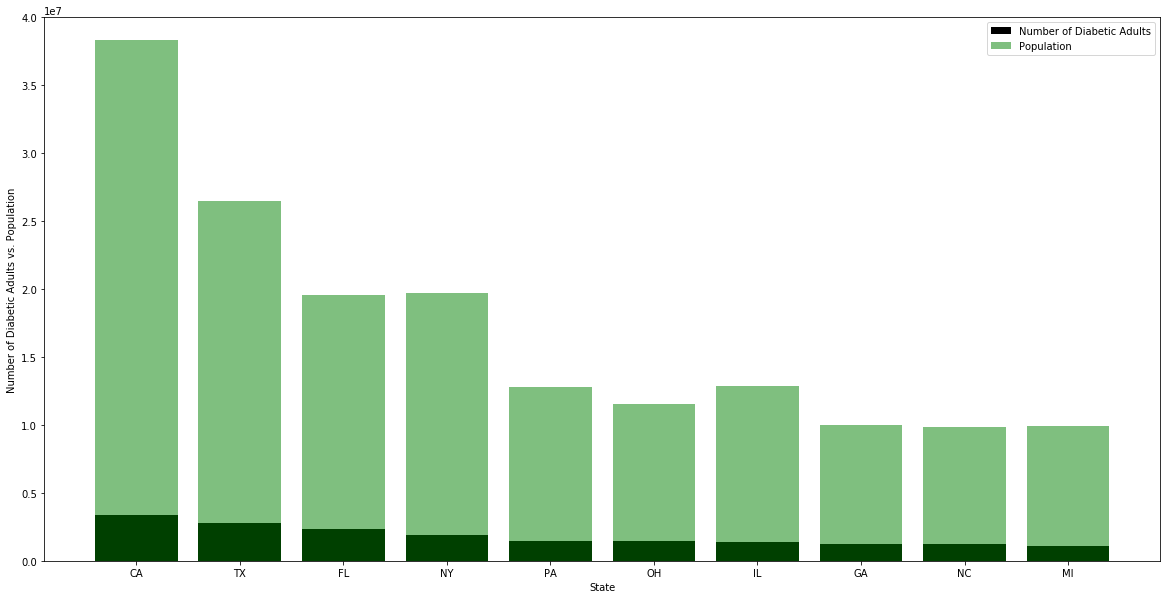

In [9]:
x_axis = np.arange(len(diabetes_ten))
tick_locations = [value for value in x_axis]


plt.figure(figsize=(20,10))
p1 = plt.bar(x_axis, diabetes_ten["Number of Diabetic Adults"], color='black', alpha=1, align="center")
p2 = plt.bar(x_axis, diabetes_ten["Population"], color='green', alpha=0.5, align="center")
plt.xticks(tick_locations, diabetes["State"], rotation="horizontal")
plt.xlabel("State")
plt.ylabel("Number of Diabetic Adults vs. Population")
plt.ylim(0, 40000000)
# plt.ylim(0, 1600000)
plt.legend((p1[0], p2[0]), ("Number of Diabetic Adults", "Population"))
plt.show()

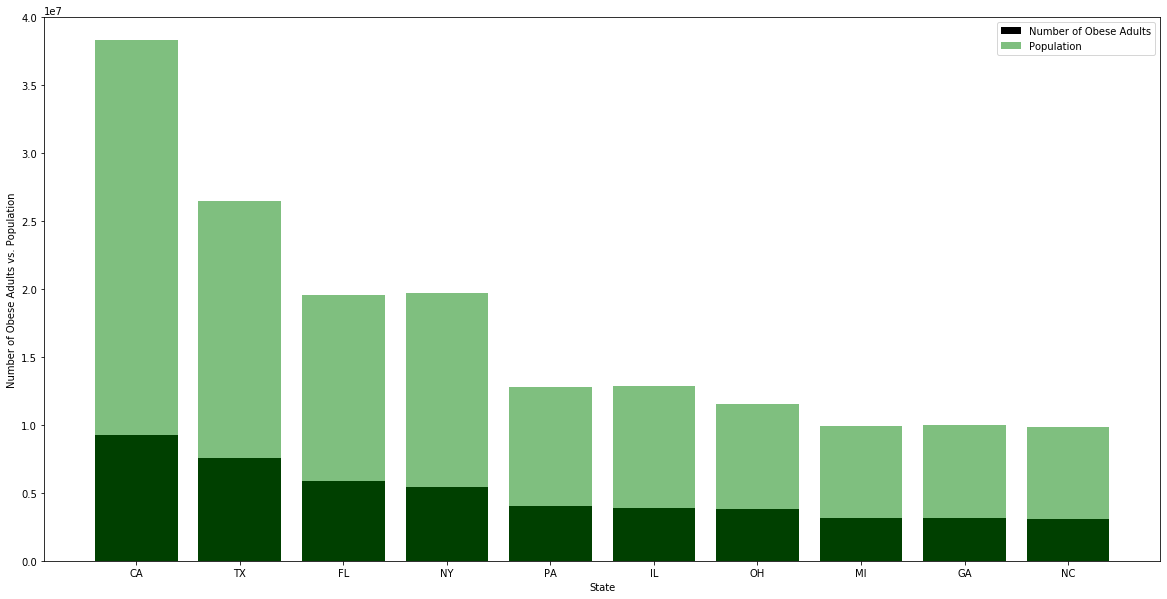

In [10]:
x_axis = np.arange(len(obese_ten))
tick_locations = [value for value in x_axis]


plt.figure(figsize=(20,10))
p1 = plt.bar(x_axis, obese_ten["Number of Obese Adults"], color='black', alpha=1, align="center")
p2 = plt.bar(x_axis, obese_ten["Population"], color='green', alpha=0.5, align="center")
plt.xticks(tick_locations, obese["State"], rotation="horizontal")
plt.xlabel("State")
plt.ylabel("Number of Obese Adults vs. Population")
plt.ylim(0, 40000000)
# plt.ylim(0, 1600000)
plt.legend((p1[0], p2[0]), ("Number of Obese Adults", "Population"))
plt.show()